<a href="https://colab.research.google.com/github/NourhanDeifSayed/Titanic-Classification/blob/main/Copy_of_Titanic_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# *Imports*

In [ ]:
import numpy as np

import pandas as pd

import matplotlib as plt

import seaborn as sns

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression

from sklearn.metrics import accuracy_score

Data preprossing



In [ ]:
#reading file
excel_file = 'titanic3.xls'
df = pd.read_excel(excel_file)



In [ ]:
#display the first 5 rows in datafram
df.head(5)

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


In [ ]:
#display the number of rows , columns of datafram

df.shape

(1309, 14)

In [ ]:
#display some infomation of the data

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pclass     1309 non-null   int64  
 1   survived   1309 non-null   int64  
 2   name       1309 non-null   object 
 3   sex        1309 non-null   object 
 4   age        1046 non-null   float64
 5   sibsp      1309 non-null   int64  
 6   parch      1309 non-null   int64  
 7   ticket     1309 non-null   object 
 8   fare       1308 non-null   float64
 9   cabin      295 non-null    object 
 10  embarked   1307 non-null   object 
 11  boat       486 non-null    object 
 12  body       121 non-null    float64
 13  home.dest  745 non-null    object 
dtypes: float64(3), int64(4), object(7)
memory usage: 143.3+ KB


In [ ]:
#number of missing values in each column
df.isnull().sum()

pclass          0
survived        0
name            0
sex             0
age           263
sibsp           0
parch           0
ticket          0
fare            1
cabin        1014
embarked        2
boat          823
body         1188
home.dest     564
dtype: int64

Data analysis


In [ ]:
#some statictics about data
df.describe()

,pclass,survived,age,sibsp,parch,fare,body
count,1309.000000,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000,121.000000
mean,2.294882,0.381971,29.881135,0.498854,0.385027,33.295479,160.809917
std,0.837836,0.486055,14.413500,1.041658,0.865560,51.758668,97.696922
min,1.000000,0.000000,0.166700,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,21.000000,0.000000,0.000000,7.895800,72.000000
50%,3.000000,0.000000,28.000000,0.000000,0.000000,14.454200,155.000000
75%,3.000000,1.000000,39.000000,1.000000,0.000000,31.275000,256.000000
max,3.000000,1.000000,80.000000,8.000000,9.000000,512.329200,328.000000


In [ ]:
#get the number of survived
df['survived'].value_counts()

0    809
1    500
Name: survived, dtype: int64

Handling The missing values


In [ ]:
df=df.drop(columns='cabin' , axis =1)

In [ ]:
df['age'].fillna(df['age'].mean(),inplace=True)

In [ ]:
print(df['embarked'].mode())

0    S
Name: embarked, dtype: object


In [ ]:
print(df['embarked'].mode()[0])

S


In [ ]:
df['embarked'].fillna(df['embarked'].mode()[0],inplace=True)

In [ ]:
df['fare'].fillna(df['fare'].mean(),inplace=True)

In [ ]:
df=df.drop(columns='body',axis=1)

In [ ]:
df=df.drop(columns='boat',axis=1)

In [ ]:
df=df.drop(columns='home.dest',axis=1)

In [ ]:
df.isnull().sum()

pclass      0
survived    0
name        0
sex         0
age         0
sibsp       0
parch       0
ticket      0
fare        0
embarked    0
dtype: int64

Data Visualization


In [ ]:
sns.set()

<Axes: xlabel='survived', ylabel='count'>

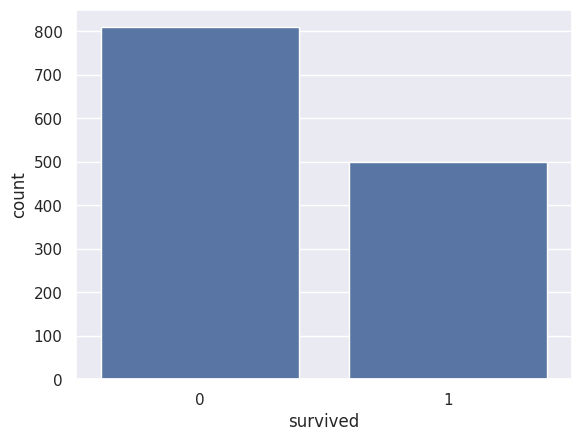

In [ ]:
sns.countplot(x='survived' , data=df)

In [ ]:
df['sex'].value_counts()

male      843
female    466
Name: sex, dtype: int64

<Axes: xlabel='sex', ylabel='count'>

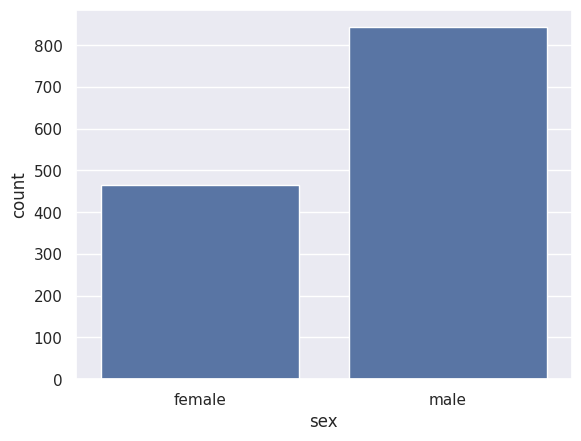

In [ ]:
sns.countplot(x='sex' , data=df)

<Axes: xlabel='survived', ylabel='count'>

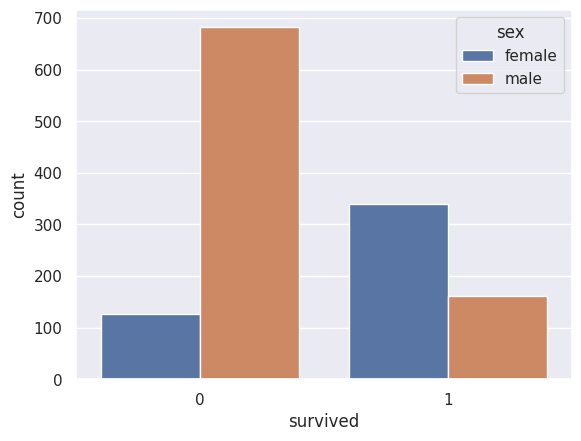

In [ ]:
sns.countplot(x='survived', hue='sex' , data =df)

<Axes: xlabel='pclass', ylabel='count'>

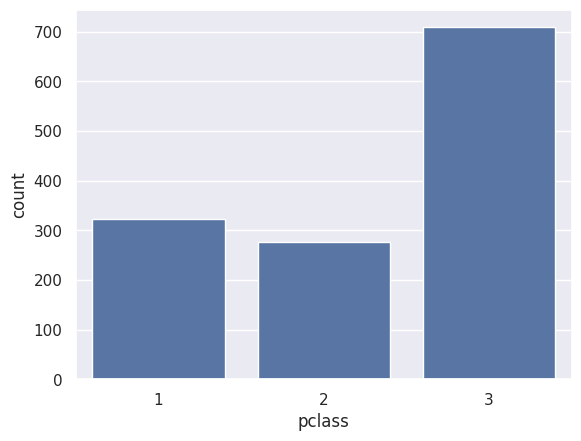

In [ ]:
sns.countplot(x='pclass',data=df)

<Axes: xlabel='pclass', ylabel='count'>

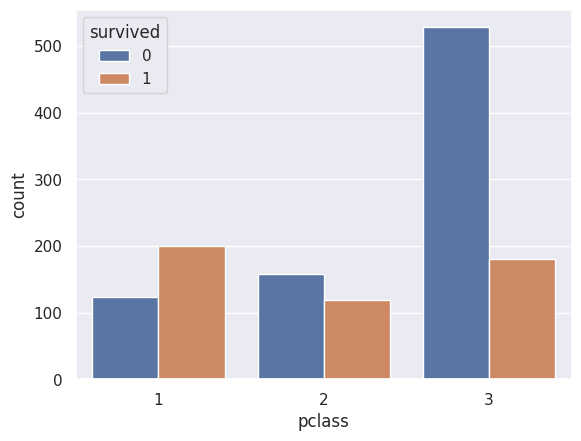

In [ ]:
sns.countplot(x='pclass',hue='survived',data=df)

Encoding categorical columns

In [ ]:
df['sex'].value_counts()

male      843
female    466
Name: sex, dtype: int64

In [ ]:
df['embarked'].value_counts()

S    914
C    270
Q    123
Name: embarked, dtype: int64

In [ ]:
df.replace({'sex':{'male':0 , 'female':1}, 'embarked':{'S':0 , 'C':1 , 'Q':2}}, inplace=True)

In [ ]:
df.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,embarked
0,1,1,"Allen, Miss. Elisabeth Walton",1,29.0000,0,0,24160,211.3375,0
1,1,1,"Allison, Master. Hudson Trevor",0,0.9167,1,2,113781,151.5500,0
2,1,0,"Allison, Miss. Helen Loraine",1,2.0000,1,2,113781,151.5500,0
3,1,0,"Allison, Mr. Hudson Joshua Creighton",0,30.0000,1,2,113781,151.5500,0
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",1,25.0000,1,2,113781,151.5500,0


Separating features and Target

In [ ]:
X=df.drop(columns=['survived','name','ticket'])

y=df['survived']

In [ ]:
print(X)

      pclass  sex        age  sibsp  parch      fare  embarked
0          1    1  29.000000      0      0  211.3375         0
1          1    0   0.916700      1      2  151.5500         0
2          1    1   2.000000      1      2  151.5500         0
3          1    0  30.000000      1      2  151.5500         0
4          1    1  25.000000      1      2  151.5500         0
...      ...  ...        ...    ...    ...       ...       ...
1304       3    1  14.500000      1      0   14.4542         1
1305       3    1  29.881135      1      0   14.4542         1
1306       3    0  26.500000      0      0    7.2250         1
1307       3    0  27.000000      0      0    7.2250         1
1308       3    0  29.000000      0      0    7.8750         0

[1309 rows x 7 columns]


In [ ]:
y

0       1
1       1
2       0
3       0
4       0
       ..
1304    0
1305    0
1306    0
1307    0
1308    0
Name: survived, Length: 1309, dtype: int64

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=5)

Model Training

In [ ]:
model=LogisticRegression()

In [ ]:
model.fit(X_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
x_prection=model.predict(X_train)

In [ ]:
print(x_prection)

[0 0 0 ... 0 0 1]


In [ ]:
#accuracy on training data
Accuracy=accuracy_score(y_train,x_prection)

print('accuarcy of training data:',Accuracy)

accuarcy of training data: 0.8022922636103151


In [ ]:
X_text_prediction=model.predict(X_test)

In [ ]:
#accuracy of test data

Accuracy_test=accuracy_score(y_test,X_text_prediction,)

print('Accuracy of test data:',Accuracy_test)

Accuracy of test data: 0.7404580152671756
